In [100]:
import matplotlib.image as img
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
# To add a mask
from scipy.cluster.vq import whiten

from sklearn.cluster import KMeans
import seaborn as sns

In [101]:
num_dominant_colors = 10

In [102]:
im = img.imread('spongebob.jpg')

In [103]:
# im

In [104]:
r = []
g = []
b = []

for row in im:
  for temp_r, temp_g, temp_b in row:
    r.append(temp_r)
    g.append(temp_g)
    b.append(temp_b)

In [105]:
image_df = pd.DataFrame({'red' : r, 'green' : g, 'blue' : b})

In [106]:
image_df['scaled_red'] = whiten(image_df['red'])
image_df['scaled_green'] = whiten(image_df['green'])
image_df['scaled_blue'] = whiten(image_df['blue'])

In [107]:
# distortions = []
# clusters = range(1,7)

# for i in clusters:
#   kmeans = KMeans(i)
#   kmeans.fit(image_df[['scaled_red','scaled_green','scaled_blue']])
#   distortions.append(kmeans.inertia_)

# sns.lineplot(x = clusters, y = distortions)

In [108]:
kmeans = KMeans(num_dominant_colors)
kmeans.fit(image_df[['scaled_red','scaled_green','scaled_blue']])
cluster_centers = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [109]:
red_std, green_std, blue_std = image_df[['red','green','blue']].std()
dominant_colors = []

for cluster_center in cluster_centers:
  red_scaled, green_scaled, blue_scaled = cluster_center
  dominant_colors.append((
      red_scaled*red_std / 255,
      green_scaled*green_std / 255,
      blue_scaled*blue_std / 255))

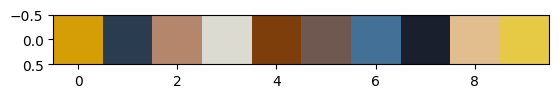

In [110]:
plt.imshow([dominant_colors])